## **HW9 K-means Clustering**

## **TODO: Ramsay Ward**


### **Introduction**

For this week's homework we are going explore our first clustering method:

  - K-Means
  
As we discussed in lecture, k-means creates clusters based on a distance measure.  Using a small example data set, we will implement the algorithm and visualize the results.

Even though the example data is small and 2 dimensional, write your helper functions to not assume a 2-D data set.  Your plotting code can reference the `x` and `y` column names from the sample data directly.

**Please ensure that all functions you implement include comprehensive docstrings with all the necessary components. The first method's docstring is provided for you as an example.**


In [1]:
# Please do not import any other libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# **K-Means Algorithm**

We will implement the Algorithm 7.1 "Basic K-means algorithm", from our textbook and apply that algorithm to a small data set provided with the assignment in the `data_kmeans.csv` file. We will build up some helper functions along the way, test them, and put it all together to apply to our small example data set.

**Load the Data**


In [2]:
# Load the data from the provided CSV file into a dataframe.
# Write your code here
df_kmeans = pd.read_csv("data_kmeans.csv")
print(df_kmeans)

            x         y
0   -0.731698 -0.874311
1   -0.547702 -0.580320
2   -0.762840 -0.885572
3   -0.340946 -0.810411
4   -0.749065 -0.399218
..        ...       ...
445 -0.526437  0.543792
446 -0.706212  0.630983
447 -0.470187  0.763061
448 -0.395677  0.542105
449 -0.524339  0.433905

[450 rows x 2 columns]


## **Q1 - Write a function that returns `k` random rows from a data frame**

**A)** To initialize the centroids, we pick `k` random points from a data frame.  Write a function `init_centroids( df_data, k )` that accepts two parameters: a data frame `df_data`, and an integer `k`, and returns the initial centroids for our k-means algorithm.  Note, we want the indices of the returned dataframe to range from 0 - (k-1) so that we can use these as the centroid labels.  Use [pandas sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method, and pass it the value of $42$ for `random_state`. Your function must have proper docstring.

In [3]:
def init_centroids( df_data, k ):
  """
    Initializes centroids for k-means algorithm.

    Parameters:
        df_data (DataFrame): Input data frame.
        k (int): Number of centroids to initialize.

    Returns:
        DataFrame: DataFrame containing initial centroids.
    """
    # Write your code here
  centroids = df_data.sample(n=k, random_state=42)
  centroids.reset_index(drop=True, inplace=True)

  return centroids

**B)** Call your function with the dataframe you created earlier

In [16]:
# Write your code here
df_centroids = init_centroids( df_kmeans, 7 )
df_centroids

,x,y
0,-0.633437,0.488756
1,-0.597736,0.632194
2,-0.635867,0.166613
3,-0.539351,-0.875532
4,-0.588597,0.293062
5,-0.127985,-0.136639
6,0.342579,0.211717


## **Q2 - Write a function to assign every row in a data frame to a centroid**

**A)** Write a function, `assign_to_centroid`, that accepts two parameters: a data frame, `df_data`, that represents our data to be clustered, and the data frame, `df_centroids`, which is of length `k` and contains the current centroids for our clusters.  The functions returns a series of the same length of `df_data` that contains the index of the closest centroid in `df_centroid`.  Use Euclidean distance as your distance measure.

For example, if a row of data contained the data point $(100,123)$ and the three centroids were in a data frame that had the following information:

  - Index 0 : (34,34)
  - Index 1 : (0,1)
  - Index 2 : (83,99)

The `assign_to_centroid` function would assign the index $2$ to that row of data. Your function must have proper docstring.

In [5]:
def assign_to_centroid(df_data, df_centroids):
    """
    Assigns each data point in df_data to the closest centroid in df_centroids based on Euclidean distance.

    Parameters:
        df_data (DataFrame): DataFrame representing the data to be clustered.
        df_centroids (DataFrame): DataFrame containing the current centroids for the clusters.

    Returns:
        Series: A series of the same length as df_data containing the index of the closest centroid in df_centroids.
    """
    assigned_centroids = pd.Series(index=df_data.index, dtype=int)

    for i, data_point in df_data.iterrows():
        distances = np.linalg.norm(df_centroids - data_point, axis=1)

        closest_centroid_index = np.argmin(distances)

        assigned_centroids[i] = closest_centroid_index

    return assigned_centroids

**B)** Check how many data points were assigned to each centroid

In [6]:
s_centroid_assignment = assign_to_centroid( df_kmeans, df_centroids )
s_centroid_assignment.value_counts()

6.0    126
1.0     94
3.0     71
5.0     58
0.0     53
2.0     26
4.0     22
Name: count, dtype: int64

## **Q3 - Write a function that recomputes the centroids**

Write a function `compute_centroids()` that takes two parameters: the data frame, `df_data` containing the data being clustered, and a series of the same length that contains the label of the assigned centroid for every row in df_data, `s_centroid_assignment`. The function will return the a data frame containing the centroids (mean) value for each unique centroid.

Note that the indices in the returned data frame should correspond to the unique values in `s_centroid_assignment`.  For example, if I found the mean value of df_data using the slice corresponding to `s_centroid_assigment == 2`, then the centroid should be in the returned data frame at `.iloc[2]`.

Your function must have proper docstring.


In [7]:
def compute_centroids(df_data, s_centroid_assignment):
    """
    Computes the centroids mean value for each unique centroid label.

    Parameters:
        df_data (DataFrame): DataFrame containing the data being clustered.
        s_centroid_assignment (Series): A series containing the label of the assigned centroid for every row in df_data.

    Returns:
        DataFrame: A data frame containing the centroids (mean) value for each unique centroid label.
    """
    df_combined = pd.concat([df_data, s_centroid_assignment.rename('centroid_label')], axis=1)

    centroids = df_combined.groupby('centroid_label').mean()

    return centroids


**Check your results by calling your method**

In [8]:
df_new_centroids = compute_centroids(df_kmeans, s_centroid_assignment)
df_new_centroids

,x,y
centroid_label,,
0.0,-0.715983,0.500552
1.0,-0.721574,0.708343
2.0,-0.738268,-0.113830
3.0,-0.696694,-0.699028
4.0,-0.546913,0.321364
5.0,-0.102365,-0.188876
6.0,0.523364,0.238569


## **Q4 - Write a function that compares two centroid data frames**

The stopping criterion for k-means is when our centroids have not moved since the last iteration.  Write a function `compare_centroids` that is given 2 centroid data frames, `df_centroid_a`, and `df_centroid_b` as parameters and returns `True` or `False` indicating if the centroids at each unique index in the data frame are equal. Use the [equals](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.equals.html) method to compare equality of pandas Series objects.  Your function must have proper docstring.

**Test your implementation by calling your function. It should print `True`, followed by `False`**

In [18]:
def compare_centroids(df_centroid_a, df_centroid_b):
    """
    Compares two centroid data frames and returns True if the centroids at each unique index in the data frames are equal.

    Parameters:
        df_centroid_a (DataFrame): First centroid data frame.
        df_centroid_b (DataFrame): Second centroid data frame.

    Returns:
        bool: True if centroids at each unique index are equal, False otherwise.
    """
    return df_centroid_a.equals(df_centroid_b)


In [19]:
print(compare_centroids( df_new_centroids, df_new_centroids ))
print(compare_centroids( df_new_centroids, df_centroids ))

True
False


## **Q5 - Write a function that implements k-means**

Write a function, `k_means`, that takes in as parameters 2 values, a data frame with values to cluster, `df_data`, and the number of clusters to form, `k`.  The function should return a series of data of the same length as `df_data` that contains the cluster assignment (an integer from 0 to (k-1)) for each row of data.  Use the helper functions defined in the prior questions. Your function must have proper docstring.

In [20]:
def k_means(df_data, k):
    """
    Performs k-means clustering on the given data frame.

    Parameters:
        df_data (DataFrame): Data frame with values to cluster.
        k (int): Number of clusters to form.

    Returns:
        Series: A series containing the cluster assignment (an integer from 0 to k-1) for each row of data.
    """
    df_centroids = df_data.sample(n=k)

    previous_centroids = pd.DataFrame()
    current_centroids = df_centroids.copy()

    while not compare_centroids(previous_centroids, current_centroids):

        centroid_assignment = assign_to_centroid(df_data, current_centroids)

        previous_centroids = current_centroids
        current_centroids = compute_centroids(df_data, centroid_assignment)

    return centroid_assignment


**Call your function with `k=5` and observe the results**

In [21]:
s_cluster_assignment = k_means( df_kmeans, 5)
s_cluster_assignment.value_counts()

1.0    178
3.0     89
4.0     74
2.0     63
0.0     46
Name: count, dtype: int64

## **Q6 - Plot the results**

Plot the points in the `df_kmeans` data frame using a 2-D scatter plot, with a different color for each cluster.  Use the cluster assignments from the previous problem (`s_cluster_assignments`).  Label your axes, and give the plot a title.

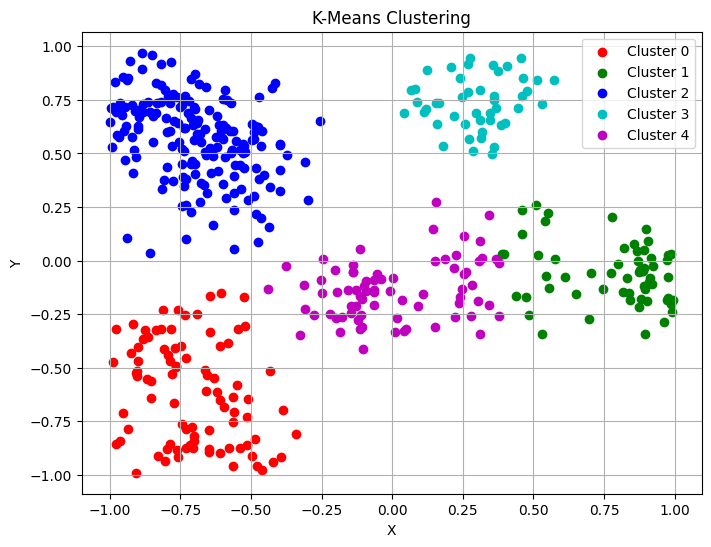

In [22]:
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm']

s_cluster_assignments = k_means(df_kmeans, 5)


for cluster_id, color in zip(range(5), colors):
    cluster_points = df_kmeans[s_cluster_assignments == cluster_id]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], c=color, label=f'Cluster {cluster_id}')

plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

